# LetsGrowMore Data Science Internship

## Intermediate Level - TASK 2

## _Prediction using Decision Tree Algorithm:_

### BY SMRITHIKA ANTONETTE

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Loading the Iris dataset
iris_data =datasets.load_iris()

iris_df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#reading the data
df=pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris_df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## _Visualize the Dataset_

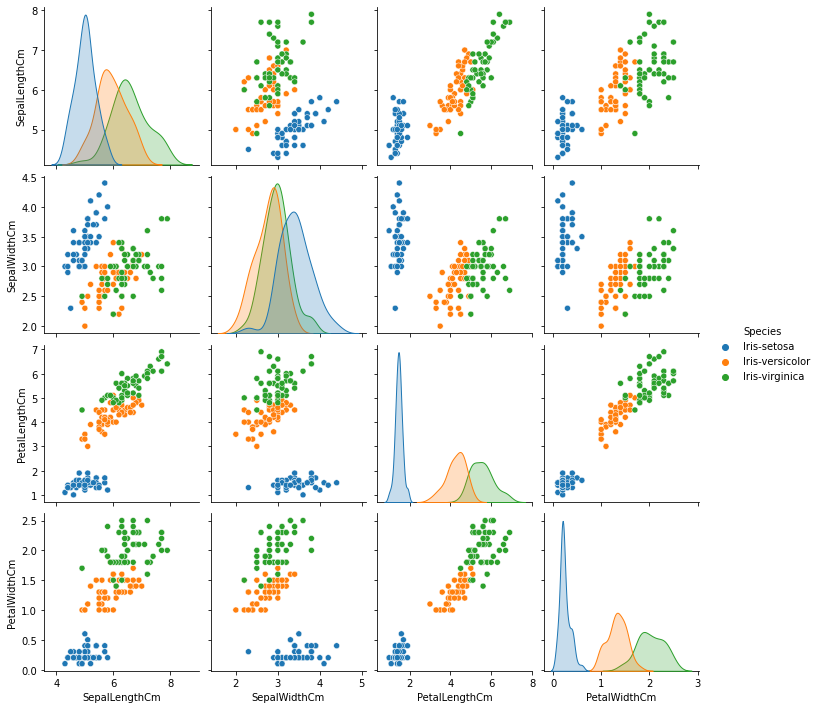

In [9]:
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Species')
plt.show()

In [10]:
#Reading the data from the computer location
iris=pd.read_csv("C:/Users/SMRITHIKA/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
iris.drop('Id',inplace=True,axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## _Find the Correlation matrix_

In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

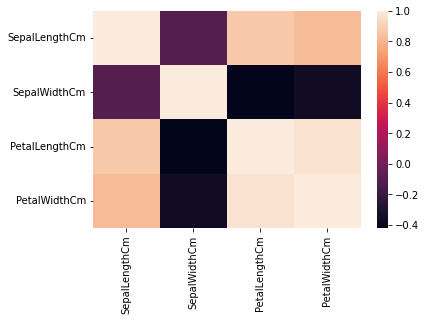

In [13]:
sns.heatmap(df.corr())

## _Prepare the Data_

In [14]:
a=iris.iloc[:,:-1].values
b=iris['Species']
a

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
b

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [16]:
a_train ,a_test ,b_train ,b_test = train_test_split(a, b, test_size=20,random_state=200)
print("Traingin split:",a_train.shape)
print("Testin spllit:",b_test.shape)

Traingin split: (130, 4)
Testin spllit: (20,)


## _Design and Train the Decision Tree Model_

In [17]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
dtree = DecisionTreeClassifier()
dtree.fit(a_train,b_train)
print("Decision Tree classifier Created")

Decision Tree classifier Created


## _Visualize the Decision Tree Model_

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 130\nvalue = [43, 43, 44]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 87\nvalue = [0, 43, 44]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.19\nsamples = 47\nvalue = [0, 42, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini = 

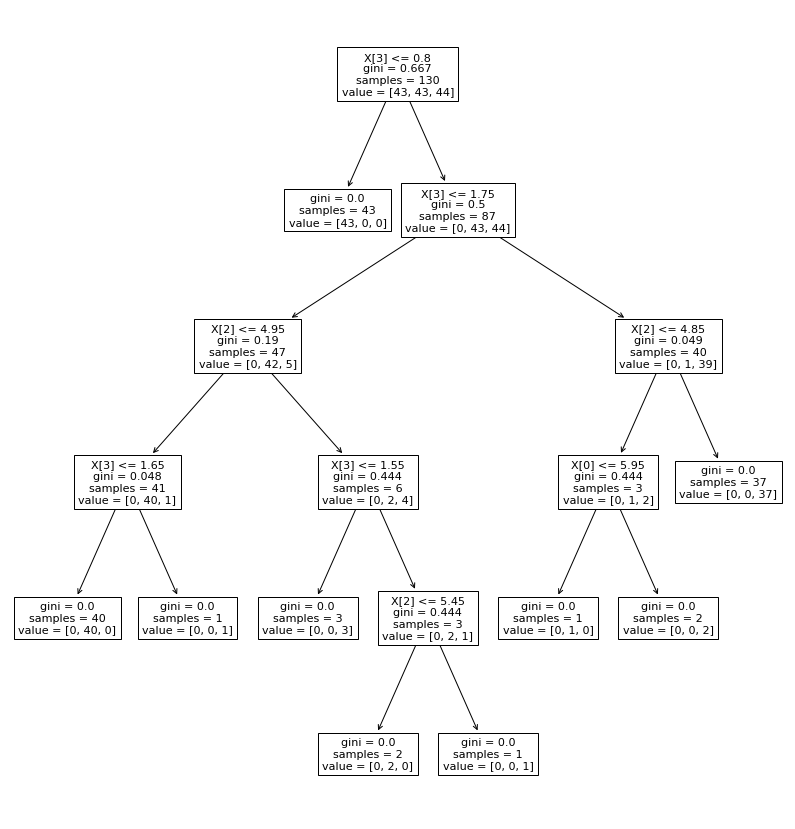

In [19]:
mt.figure(figsize=(14,15))
tree.plot_tree(dtree)

## _Visualizing the Decision Tree Model filled with colors_

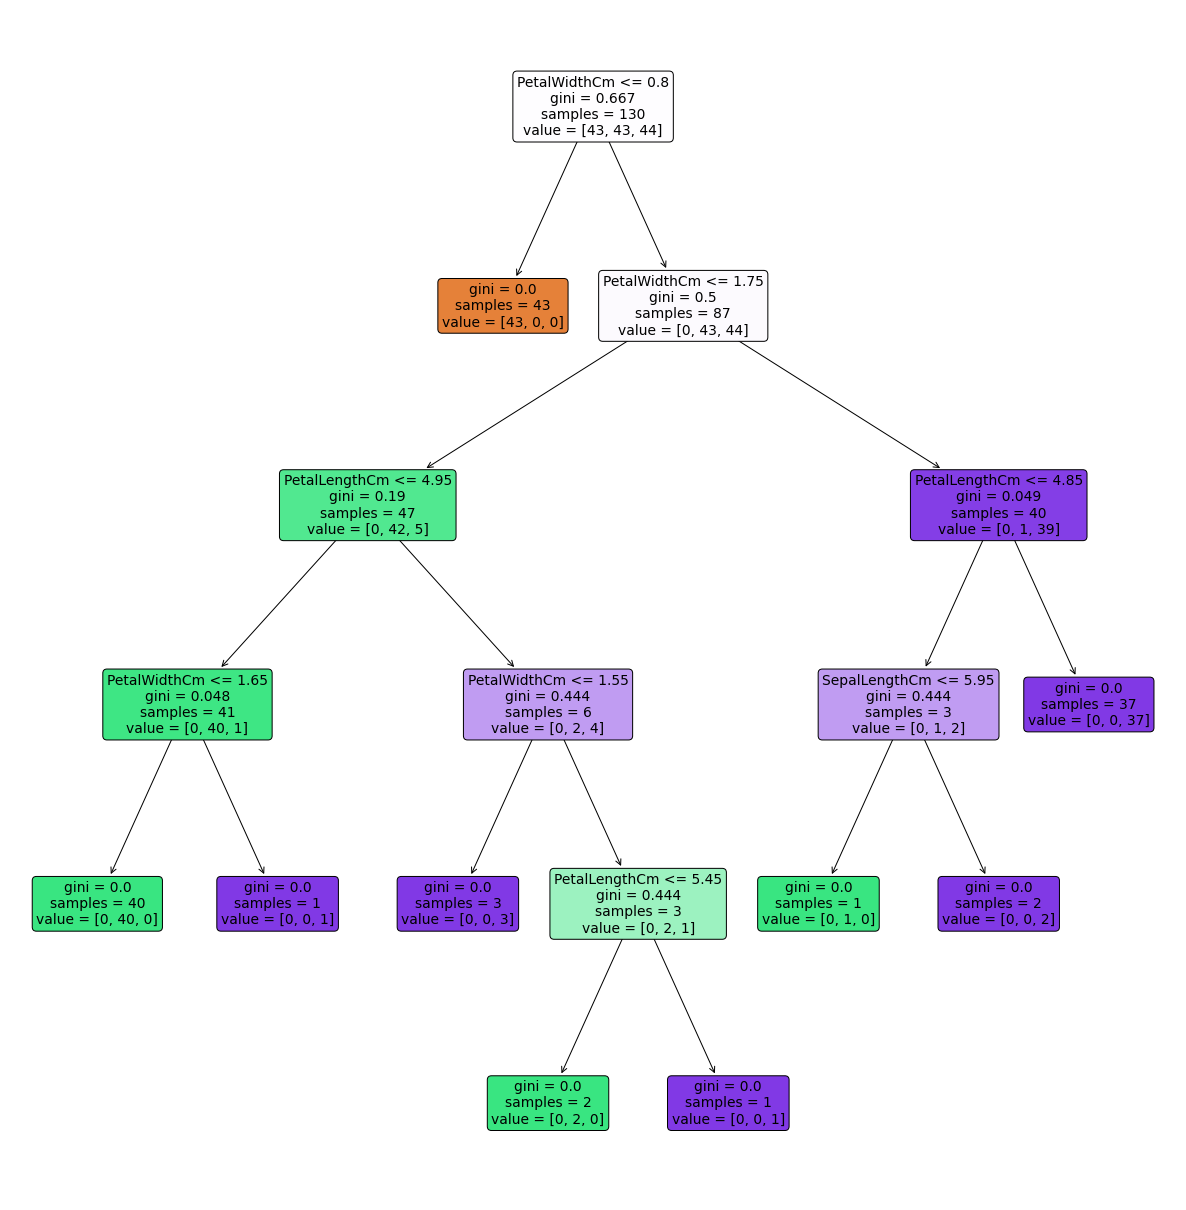

In [20]:
mt.figure(figsize=(21,22))
tree=plot_tree(dtree,feature_names=df.columns,precision=3,rounded=True,filled=True)

## _Making Prediction_

In [21]:
b_pred= dtree.predict(a_test)
b_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()

b = label.fit_transform(b_pred)
b

array([1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2])

In [ ]:
## _Evaluate the model_

In [23]:
import sklearn.metrics as sm
print("Accuracy of the model:",sm.accuracy_score(b_test,b_pred))

Accuracy of the model: 1.0


In [24]:
#comparing the actutal vs predicted

result_df = pd.DataFrame({"ACTUAL":b_test,"PREDICTED":b_pred})
result_df

,ACTUAL,PREDICTED
84,Iris-versicolor,Iris-versicolor
122,Iris-virginica,Iris-virginica
28,Iris-setosa,Iris-setosa
24,Iris-setosa,Iris-setosa
75,Iris-versicolor,Iris-versicolor
109,Iris-virginica,Iris-virginica
81,Iris-versicolor,Iris-versicolor
98,Iris-versicolor,Iris-versicolor
80,Iris-versicolor,Iris-versicolor
100,Iris-virginica,Iris-virginica


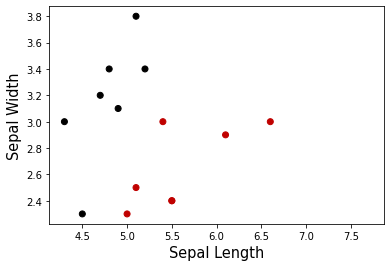

In [25]:
plt.scatter(a_test[:,0],a_test[:,1],c=b , cmap='gist_heat')
plt.xlabel('Sepal Length',fontsize=14.5)
plt.ylabel('Sepal Width',fontsize=14.5)
plt.show()

In [26]:
print(classification_report (b_test, b_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



In [27]:
#confusion matrix alone
conf_matrix=confusion_matrix(b_test,b_pred)
conf_matrix

array([[7, 0, 0],
       [0, 7, 0],
       [0, 0, 6]], dtype=int64)

## The Decision Tree Classifier is finally created and is finally visaulized graphically.
## The Prediction also calculated using decision tree algorithm.
## The Accuracy of the model evaluated